In [27]:
import cv2
import numpy as np
from mahotas.features import surf
from scipy.spatial import distance
from IPython.display import display
from PIL import Image

In [28]:
low_contrast_im = cv2.imread('/home/sveta/ComputerVision/image3_l.jpg')
high_contrast_im = cv2.imread('/home/sveta/ComputerVision/image3_h.jpg')

In [29]:
gray_contrast_im = cv2.cvtColor(high_contrast_im, cv2.COLOR_RGB2GRAY)
gray_low_contrast = cv2.cvtColor(low_contrast_im, cv2.COLOR_RGB2GRAY)

In [30]:
surf_conrast_im = surf.surf(gray_contrast_im)
surf_low_contrast_im = surf.surf(gray_low_contrast)

In [34]:
def matcher(desc_1, desc_2):
    matches = []
    for i in range(len(desc_1)):
        for j in range(len(desc_2)):
            dst = distance.euclidean(desc_1[i].reshape(1, -1), desc_2[j].reshape(1, -1))
            if dst < 30:
                matches.append(cv2.DMatch(_queryIdx=i, _trainIdx=j, _imgIdx=0,_distance=dst))
    return matches

In [35]:
res = matcher(surf_conrast_im[:, 6:], surf_low_contrast_im[:, 6:])

In [36]:
def key_points(surf_conrast_im, surf_low_contrast_im):
    kp1, kp2 = [], []

    for i, j in zip(range(len(surf_conrast_im)), range(len(surf_low_contrast_im))):
        y, x, scale, _ ,_ , angle = surf_conrast_im[i][:6]
        kp1.append(cv2.KeyPoint(x, y, scale, angle))
        y, x, scale, _, _, angle = surf_low_contrast_im[j][:6]
        kp2.append(cv2.KeyPoint(x, y, scale, angle))
        
    return kp1, kp2
kp1, kp2 = key_points(surf_conrast_im, surf_low_contrast_im)

In [37]:
res = sorted(res, key = lambda x:x.distance)

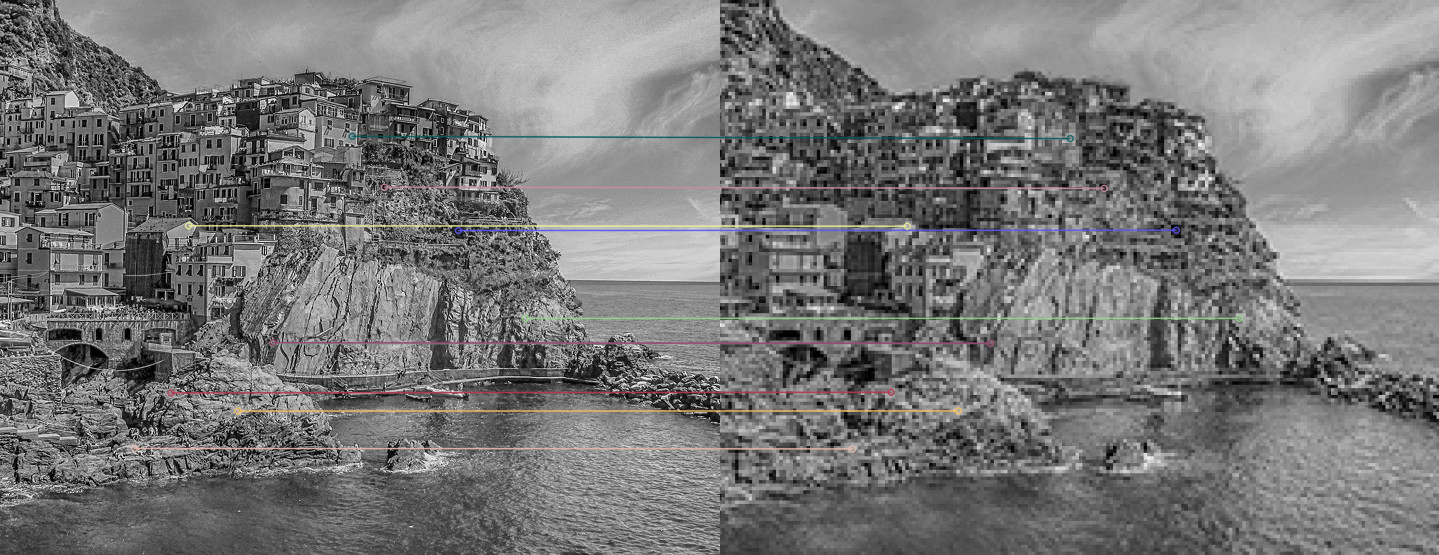

In [38]:
res_im =cv2.drawMatches(gray_contrast_im, kp1, gray_low_contrast, kp2, res[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
display(Image.fromarray(res_im))

In [39]:
gray_contrast_im_rotated = gray_contrast_im.copy()
num_rows, num_cols = gray_contrast_im_rotated.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 20, 1)
gray_contrast_im_rotated = cv2.warpAffine(gray_contrast_im_rotated, rotation_matrix, (num_cols, num_rows))

#display(Image.fromarray(gray_contrast_im))
#display(Image.fromarray(gray_contrast_im_rotated))

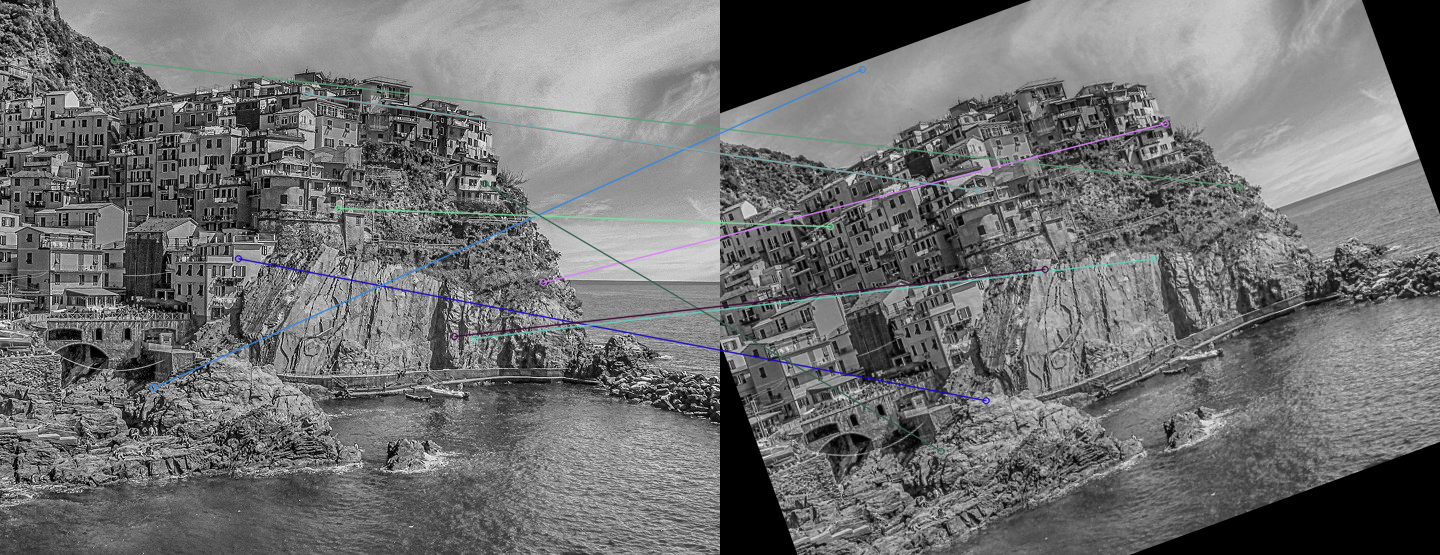

In [40]:
surf_contrast_im_rotated = surf.surf(gray_contrast_im_rotated)
res2 = matcher(surf_conrast_im[:, 6:], surf_contrast_im_rotated[:, 6:])
res2 = sorted(res2, key = lambda x:x.distance)
kp1_2, kp2_2 = key_points(surf_conrast_im, surf_contrast_im_rotated)
res_im2 =cv2.drawMatches(gray_contrast_im, kp1_2, gray_contrast_im_rotated, kp2_2, res2[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
display(Image.fromarray(res_im2))

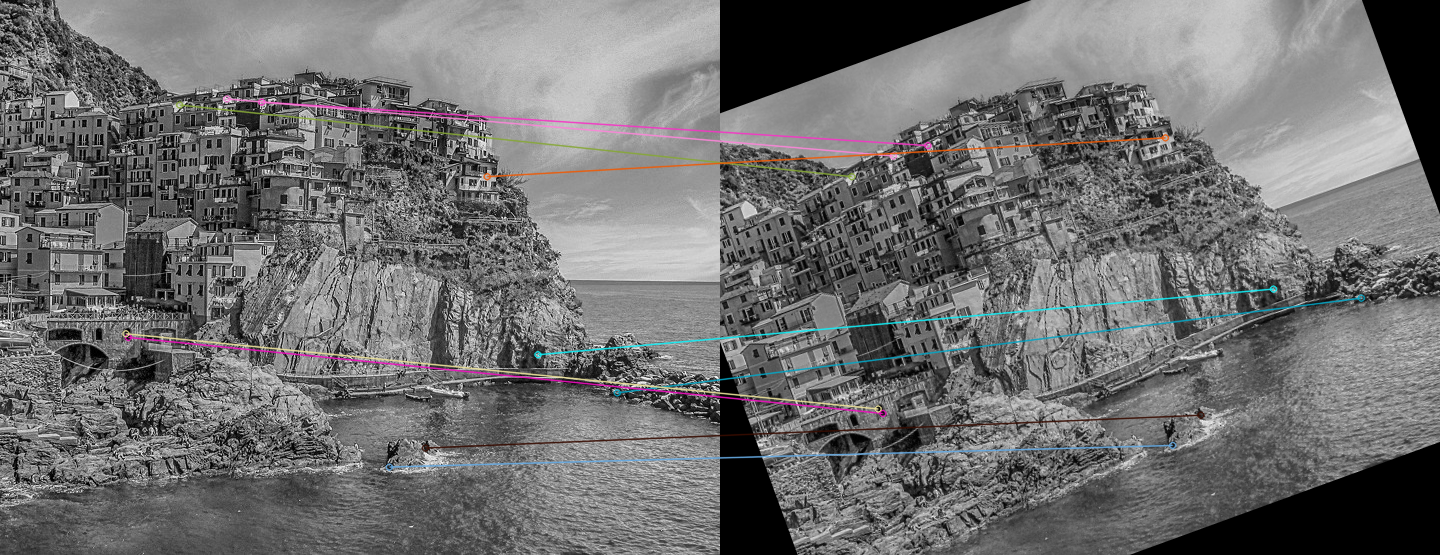

In [89]:
orb = cv2.ORB_create(100)

# find the keypoints and descriptors with ORB
kp_1, des_1 = orb.detectAndCompute(gray_contrast_im, None)
kp_2, des_2 = orb.detectAndCompute(gray_contrast_im_rotated, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des_1, des_2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
res_3 =cv2.drawMatches(gray_contrast_im, kp_1 , gray_contrast_im_rotated, kp_2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
display(Image.fromarray(res_3))